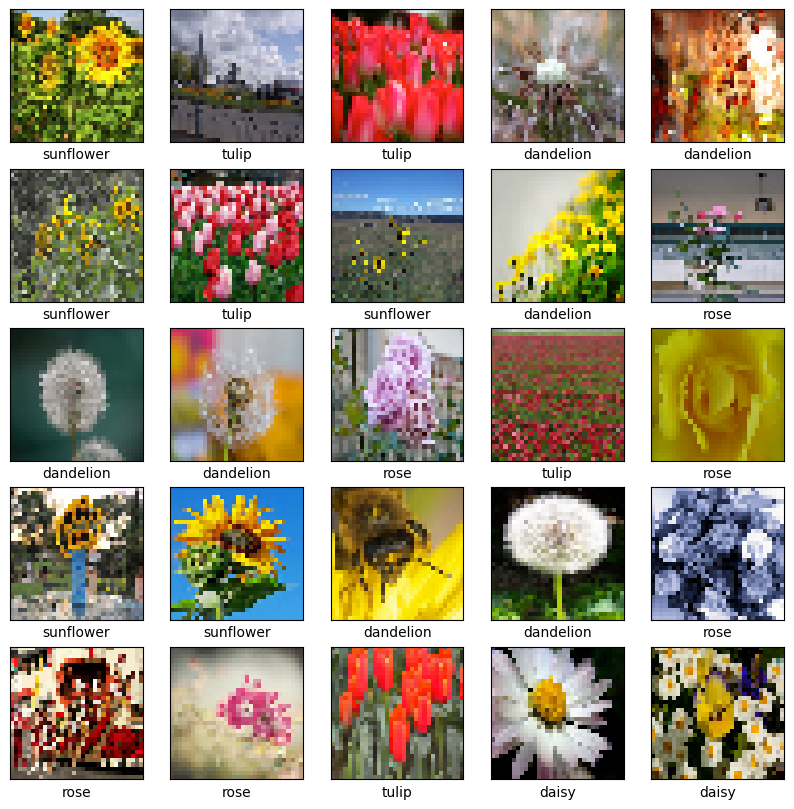

Archivos extraídos:
['flowers']


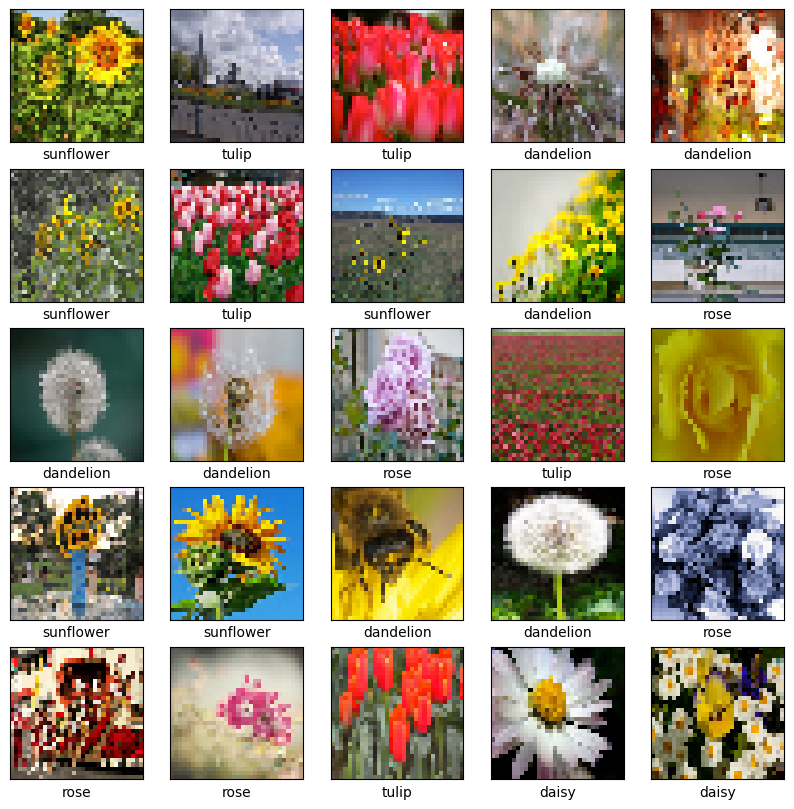

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_7 (Flatten)         (None, 1024)             

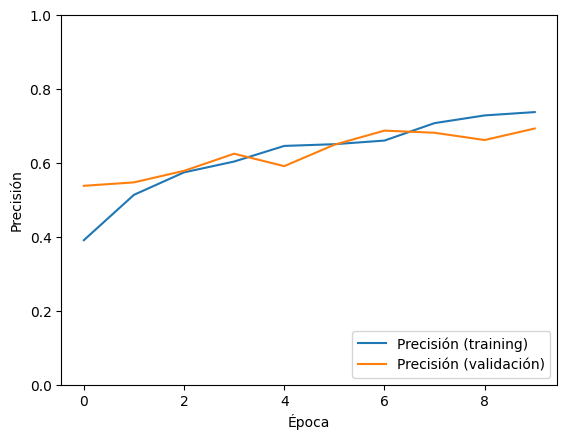

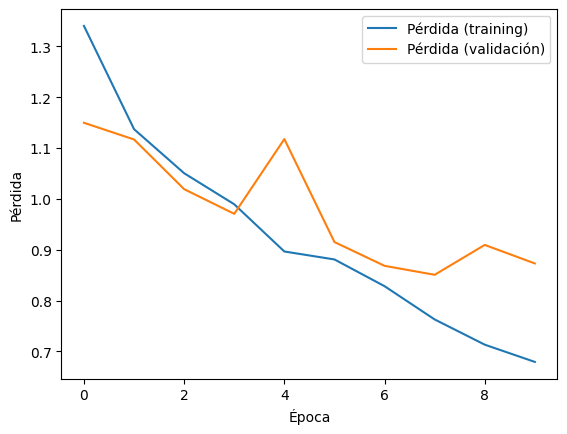

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


27/27 [==============================] - 0s 11ms/step
Precisión del modelo en datos de prueba: 0.6932870370370371
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       154
           1       0.70      0.53      0.60       169
           2       0.61      0.82      0.70       208
           3       0.67      0.62      0.64       182
           4       0.73      0.72      0.73       151

    accuracy                           0.69       864
   macro avg       0.71      0.69      0.69       864
weighted avg       0.70      0.69      0.69       864



In [19]:
#Proyecto_Final Entrenamiento de una red neuronal convolucional.
#Inteligencia Artificial y Redes Neuronales. N4 006
#Integrantes del equipo
#Bayron Javier Hernández Sifuentes 2132169
#Brisa Marlene Mar Santiago 2127823
#Leonardo Rodrigo Salinas Mejia 2035376
#Bruce Brandon Leija Cortés 1982141
#Miguel Fernando Tovar Chávez 2127889
# Obtener los nombres de las subcarpetas dentro de la carpeta "flowers"
class_names = os.listdir(data_dir_flowers)

# Visualizar algunas imágenes de ejemplo
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()
import zipfile
import os

# Ruta del archivo zip
zip_file_path = "/content/archive2.zip"

# Directorio de extracción
extract_dir = "/content/data"

# Descomprime el archivo zip
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Lista los archivos y directorios en el directorio de extracción
extracted_files = os.listdir(extract_dir)
print("Archivos extraídos:")
print(extracted_files)
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split

def load_data(data_dir):
    categories = os.listdir(data_dir)
    images = []
    labels = []
    for category in categories:
        path = os.path.join(data_dir, category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                img_array = cv2.resize(img_array, (32, 32))
                images.append(img_array)
                labels.append(class_num)
            except Exception as e:
                pass
    return np.array(images), np.array(labels)

# Directorio donde se encuentran las imágenes de las flores
data_dir_flowers = os.path.join(data_dir, "flowers")

# Cargar las imágenes y las etiquetas
X, y = load_data(data_dir_flowers)


X = X / 255.0


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualizar algunas imágenes de ejemplo
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()
from tensorflow.keras import layers, models

# modelo
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

# Compilar
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.summary()

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
import matplotlib.pyplot as plt

# Graficar la precisión
plt.plot(history.history['accuracy'], label='Precisión (training)')
plt.plot(history.history['val_accuracy'], label = 'Precisión (validación)')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Graficar la pérdida
plt.plot(history.history['loss'], label='Pérdida (training)')
plt.plot(history.history['val_loss'], label = 'Pérdida (validación)')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.show()
# Guardar el modelo entrenado
model.save("flower_classification_model.h5")
from tensorflow.keras.models import load_model

# Cargar el modelo guardado
loaded_model = load_model("flower_classification_model.h5")
# Hacer predicciones en datos de prueba
predictions = model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report

# Calcular la precisión del modelo en datos de prueba
accuracy = accuracy_score(y_test, predictions.argmax(axis=1))
print("Precisión del modelo en datos de prueba:", accuracy)

# Mostrar un informe de clasificación detallado
print(classification_report(y_test, predictions.argmax(axis=1)))

